# Monte Carlo Simulation of Stock Prices

 In this project, we will be applying a model to generate future stock prices given the daily volatility of an asset or a portfolio of assets. Here we will generate a model for Apple Inc(AAPL).  <br>
 Note: This is not a robust financial analysis. 
 

In [1]:
#Imports
import pandas_datareader.data as data
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style 
%matplotlib inline

In [2]:
style.use('ggplot')

In [3]:
#Dates for our time series data 
start = dt.datetime(2017,1,3)
end= dt.datetime(2022,3,9)


In [4]:
prices = data.DataReader('AAPL','yahoo',start,end)

In [5]:
prices

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.297691
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.267138
2017-01-05,29.215000,28.952499,28.980000,29.152500,88774400.0,27.405802
2017-01-06,29.540001,29.117500,29.195000,29.477501,127007600.0,27.711329
2017-01-09,29.857500,29.485001,29.487499,29.747499,134247600.0,27.965151
...,...,...,...,...,...,...
2022-03-03,168.910004,165.550003,168.470001,166.229996,76678400.0,166.229996
2022-03-04,165.550003,162.100006,164.490005,163.169998,83737200.0,163.169998
2022-03-07,165.020004,159.039993,163.360001,159.300003,96213500.0,159.300003


In [6]:
prices = prices['Close']
prices

Date
2017-01-03     29.037500
2017-01-04     29.004999
2017-01-05     29.152500
2017-01-06     29.477501
2017-01-09     29.747499
                 ...    
2022-03-03    166.229996
2022-03-04    163.169998
2022-03-07    159.300003
2022-03-08    157.440002
2022-03-09    163.250000
Name: Close, Length: 1305, dtype: float64

The returns for a stock is typically defined by the following equation: 

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

 We can use pandas pct_change() method on the Close column to create a column representing this return value.

In [7]:
returns = prices.pct_change()
returns

Date
2017-01-03         NaN
2017-01-04   -0.001119
2017-01-05    0.005085
2017-01-06    0.011148
2017-01-09    0.009159
                ...   
2022-03-03   -0.001981
2022-03-04   -0.018408
2022-03-07   -0.023718
2022-03-08   -0.011676
2022-03-09    0.036903
Name: Close, Length: 1305, dtype: float64

In [8]:
last_price = prices[-1]
last_price

163.25

In [9]:
#Number of simulations 
num_sim = 1000
# Defining time horizon(i.e number of days in the future)
num_days = 252 #Number of trading days in a year

In [10]:
sim_df = pd.DataFrame()

In [16]:
for x in range(num_sim):
    count = 0 #number of days to be accounted for 
    daily_sd = returns.std()#daily volatility
    price_series = []
    price = last_price*(1+np.random.normal(0,daily_sd))
    #where 1+np.random.normal(0,daily_sd) is the random shock
    price_series.append(price)
    
    for y in range(num_days):
        if count == 251:
            break
        price = price_series[count]*(1+np.random.normal(0,daily_sd))
        price_series.append(price)
        count = count + 1
        
    sim_df[x] = price_series
    

In [17]:
sim_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,166.922395,160.841738,159.511283,164.504041,166.186530,159.412725,163.901821,160.963781,163.310045,158.697788,...,168.345304,163.471361,166.143040,162.170765,165.592012,161.680072,162.390230,164.712117,167.565311,165.197218
1,163.860572,161.514636,160.572151,166.053298,170.952307,161.394184,168.516652,157.064187,163.474188,155.448264,...,169.150682,164.965712,163.997051,163.665561,158.031160,158.764010,163.841252,167.250504,169.095102,165.449314
2,166.273944,158.990347,160.884378,163.611376,174.526830,160.729931,172.065759,159.802584,163.121890,155.703803,...,167.988060,165.854248,160.808654,167.172795,155.715062,159.950758,160.767116,168.393864,164.923778,169.600068
3,166.971633,158.268197,159.445003,160.316290,176.850464,155.692701,165.494542,158.991811,162.122787,156.670453,...,173.098232,166.178156,161.079554,170.004243,153.420574,160.832630,161.465814,167.588730,161.252699,170.845173
4,165.961032,154.816706,157.956021,161.142302,174.462741,155.405629,166.325415,153.625506,158.412828,159.947942,...,173.158459,170.088856,167.629674,173.298481,153.211965,160.688027,165.509777,169.876334,158.850919,169.699997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,156.440172,110.543732,209.580120,90.275477,198.986593,102.948047,167.731840,67.714421,157.302142,171.128844,...,82.565068,174.536805,154.965899,107.272888,100.694597,78.559495,125.811114,271.633229,126.575274,104.560253
248,153.543497,114.217180,217.381664,94.171773,192.920195,103.934918,167.136268,67.689228,156.564822,171.710403,...,83.417579,168.770973,156.487514,108.403009,102.647143,78.383926,124.226565,269.633689,121.360160,104.730192
249,157.759859,116.681084,219.860454,93.299978,192.792251,103.879574,168.787787,67.479699,157.208178,170.296267,...,85.046290,167.265630,158.996839,108.222821,101.794943,79.255502,121.884748,276.864355,123.195499,108.784651
250,158.565432,113.168288,215.107213,90.337659,189.537084,104.660410,170.692112,68.637699,159.171714,172.909473,...,85.404493,170.871224,159.883963,107.738743,102.019972,80.751965,118.665587,276.088286,124.984255,107.263301


Text(0.5, 1.0, 'Monte Carlo Simulation: AAPL')

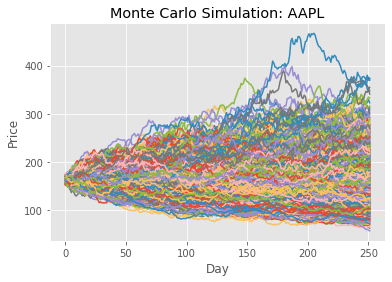

In [25]:
#Visualization 
plt.plot(sim_df)
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Monte Carlo Simulation: AAPL')